# Data preparation

### import necessary liberaries

In [233]:
from bs4 import BeautifulSoup
import requests
import json
from xml.dom import minidom

### Load in json file

In [234]:
# Reading the data inside the xml file to a variable under the name  data
with open('Belgianplayers.xml', 'r') as f:
    data = f.read() 

# Passing the stored data inside the beautifulsoup parser 
players_soup = BeautifulSoup(data, 'xml') 

print(players_soup)

<?xml version="1.0" encoding="utf-8"?>
<PackData desc="SW Download  - Player Data - . Generated at 2021-09-07 18:26:27" name="SW Download 2021-09-07_1631035587">
<PlayerData>
<P f="Thomas" i="https://cdn.soccerwiki.org/images/player/3075.png" id="3075" s="VERMAELEN"/>
<P f="Stanley" i="https://cdn.soccerwiki.org/images/player/3091.png" id="3091" s="ABORAH"/>
<P f="Bram" i="https://cdn.soccerwiki.org/images/player/3206.png" id="3206" s="CASTRO"/>
<P f="Silvio" i="https://cdn.soccerwiki.org/images/player/4220.png" id="4220" s="PROTO"/>
<P f="Anthony" i="https://cdn.soccerwiki.org/images/player/4225.png" id="4225" s="VANDEN BORRE"/>
<P f="Olivier" i="https://cdn.soccerwiki.org/images/player/4228.png" id="4228" s="DESCHACHT"/>
<P f="Jonathan" i="https://cdn.soccerwiki.org/images/player/4238.png" id="4238" s="LEGEAR"/>
<P f="Logan" i="https://cdn.soccerwiki.org/images/player/4268.png" id="4268" s="BAILLY"/>
<P f="Faris" i="https://cdn.soccerwiki.org/images/player/4280.png" id="4280" s="HARO

In [235]:
def get_info_player(row_player):
    player = {} 
# first letter of first name always starts 4th place
# place where first name ends
    firstname_end = row_player.find('" i=')
    firstname = row_player[3:firstname_end]

    player["firstname"] = firstname

# last letter of last name always starts 5th place
# place where last name begins
    lastname_begin = row_player.find('s="')+3
    lastname = row_player[lastname_begin:-4]
    player["lastname"] = lastname

    fullname = firstname + " " + lastname
    player["fullname"] = fullname

    idd_begin = row_player.find('id="')+4
    idd_end = row_player.find('" s')
    idd_string = row_player[idd_begin:idd_end]
    player["idd"] = idd_string
    
    return player


In [236]:
players_string = str(players_soup)
players_string = players_string.split("<P ")
# eliminate heading
players_string = players_string[1:]

player_list = []
for row_player in players_string:
    player = get_info_player(row_player)
    player_list.append(player)


player_list

    

[{'firstname': 'Thomas',
  'lastname': 'VERMAELEN',
  'fullname': 'Thomas VERMAELEN',
  'idd': '3075'},
 {'firstname': 'Stanley',
  'lastname': 'ABORAH',
  'fullname': 'Stanley ABORAH',
  'idd': '3091'},
 {'firstname': 'Bram',
  'lastname': 'CASTRO',
  'fullname': 'Bram CASTRO',
  'idd': '3206'},
 {'firstname': 'Silvio',
  'lastname': 'PROTO',
  'fullname': 'Silvio PROTO',
  'idd': '4220'},
 {'firstname': 'Anthony',
  'lastname': 'VANDEN BORRE',
  'fullname': 'Anthony VANDEN BORRE',
  'idd': '4225'},
 {'firstname': 'Olivier',
  'lastname': 'DESCHACHT',
  'fullname': 'Olivier DESCHACHT',
  'idd': '4228'},
 {'firstname': 'Jonathan',
  'lastname': 'LEGEAR',
  'fullname': 'Jonathan LEGEAR',
  'idd': '4238'},
 {'firstname': 'Logan',
  'lastname': 'BAILLY',
  'fullname': 'Logan BAILLY',
  'idd': '4268'},
 {'firstname': 'Faris',
  'lastname': 'HAROUN',
  'fullname': 'Faris HAROUN',
  'idd': '4280'},
 {'firstname': 'Igor',
  'lastname': 'DE CAMARGO',
  'fullname': 'Igor DE CAMARGO',
  'idd': '

### Gather additional data 

In [237]:
def get_more_info_player(link, player):
    r = requests.get(link)
    # convert to beautiful soup object
    soup = BeautifulSoup(r.content)
        
    # print the webpage
    realLifeTable = soup.find(id = "realLifeTable")
    #print(realLifeTable.prettify())
    additional_data = realLifeTable.find_all("tr")
    #print(additional_data)
    for index, data_point in enumerate(additional_data):
        #  we don't need it, we already have the name
        if index == 0:
            continue
        else:
            #print(data_point.prettify())
            name_data_point = data_point.find("th")
            value_data_point = data_point.find("td")
            player[name_data_point.get_text()] = value_data_point.get_text()
    return player

In [238]:
basislink = "https://en.soccerwiki.org/player.php?pid="

# iterate trough players list and append additional info

for index,player in enumerate(player_list):
    # exeption for divock Origi, not available
        idd = player["idd"]
        link = basislink + idd
        
        player = get_more_info_player(link, player)
        
        #r = requests.get(link)
        # convert to beautiful soup object
        #soup = BeautifulSoup(r.content)
        
        # print the webpage
        #realLifeTable = soup.find(id = "realLifeTable")
        #print(realLifeTable.prettify())
        #additional_data = realLifeTable.find_all("tr")
        #print(additional_data)
        #for index2, data_point in enumerate(additional_data):
            #  we don't need it, we already have the name
            #if index2 == 0:
                #continue
            #else:
                #print(data_point.prettify())
                #name_data_point = data_point.find("th")
                #value_data_point = data_point.find("td")
                #player[name_data_point.get_text()] = value_data_point.get_text()
                #print(additional_data2[1].get_text())  
player_list


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [ ]:
for index,players in enumerate(player_list):
    print(index)
    print(players)

In [ ]:
player_list


### Save/Reload data

In [150]:
import json

def safe_data(title, data):
    with open(title, "w", encoding = "utf-8") as f:
        json.dump(data, f, ensure_ascii = False, indent = 2)

In [151]:
import json

def load_data(title):
    with open(title, encoding = "utf-8") as f:
        return json.load(f)

In [170]:
safe_data("Data_Belgian_Players.json", player_list)

### Clean data

In [ ]:
import pandas as pd

Data_Belgian_Players = pd.read_json("Data_Belgian_Players.json")
num_Belgian_players = len(Data_Belgian_Players)
Data_Belgian_Players.head(10)

In [186]:
Data_Belgian_Players["birth_year"]= Data_Belgian_Players["Date of Birth"].apply(lambda x: x.lstrip().split(" ")[2])
Data_Belgian_Players["birth_month"]= Data_Belgian_Players["Date of Birth"].apply(lambda x: x.lstrip().split(" ")[1])
Data_Belgian_Players["birth_day"]= Data_Belgian_Players["Date of Birth"].apply(lambda x: x.lstrip().split(" ")[0])
Data_Belgian_Players

,firstname,lastname,fullname,idd,Club,Age,Date of Birth,Nation,Height (cm),Weight (kg),Hair Colour,Hairstyle,Skin Colour,Facial Hair,Squad Number,On Loan at,birth_year,birth_month,birth_day
0,Thomas,VERMAELEN,Thomas VERMAELEN,3075,Vissel Kobe,35,14 November 1985,Belgium,183,80,Dark Brown,Short,White,Clean,4,NaN,1985,November,14
1,Stanley,ABORAH,Stanley ABORAH,3091,Waterford FC (Retired),34,23 June 1987,Belgium,176,63,Black,Unknown,White,Unknown,Not set,NaN,1987,June,23
2,Bram,CASTRO,Bram CASTRO,3206,Unknown,38,30 September 1982,Belgium,191,83,Black,Unknown,White,Unknown,1,NaN,1982,September,30
3,Silvio,PROTO,Silvio PROTO,4220,SS Lazio (Retired),38,23 May 1983,Belgium,184,72,Black,Short,White,Clean,24,NaN,1983,May,23
4,Anthony,VANDEN BORRE,Anthony VANDEN BORRE,4225,RSC Anderlecht,33,24 October 1987,Belgium,190,80,Black,Bald,Brown,Beard,18,NaN,1987,October,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,Bryan,VAN HOVE,Bryan VAN HOVE,114456,Helmond Sport,21,17 June 2000,Belgium,176,73,Blonde,Short,White,Clean,17,NaN,2000,June,17
975,Ilias,BREUGELMANS,Ilias BREUGELMANS,114457,KV Mechelen,20,22 December 2000,Belgium,170,59,Blonde,Short,White,Clean,2,Helmond Sport,2000,December,22
976,Jarno,LION,Jarno LION,114459,KV Mechelen,20,13 February 2001,Belgium,180,73,Brown,Cropped,White,Stubble,6,Helmond Sport,2001,February,13
977,Jules,HOUTTEQUIET,Jules HOUTTEQUIET,114461,KV Mechelen,19,5 September 2002,Belgium,184,69,Blonde,Short,White,Clean,12,Helmond Sport,2002,September,5


In [199]:
gb = Data_Belgian_Players.groupby(['birth_month']).count()
gb

,firstname,lastname,fullname,idd,Club,Age,Date of Birth,Nation,Height (cm),Weight (kg),Hair Colour,Hairstyle,Skin Colour,Facial Hair,Squad Number,On Loan at,birth_year,birth_day
birth_month,,,,,,,,,,,,,,,,,,
April,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,2,96,96
August,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,2,72,72
December,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,4,52,52
February,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,7,96,96
January,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,4,132,132
July,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,3,73,73
June,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,3,74,74
March,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,3,95,95
May,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,6,96,96


In [224]:
import matplotlib.pyplot as plt

months = ['January', 'February', 'March', 'April', 'May', 'June','July','September','October','November','December']


In [205]:
x = gb['firstname']

In [206]:
type(x)

pandas.core.series.Series

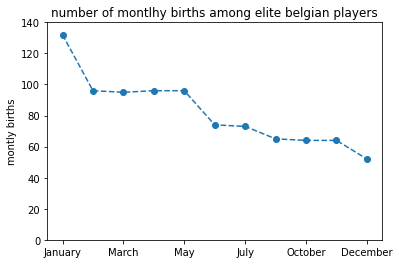

In [222]:
# put them in the right order
x = x.reindex(index = months)


x.plot(marker = 'o', linestyle = '--')

plt.ylabel("montly births")
plt.xlabel("")
plt.title("number of montlhy births among elite belgian players")
plt.ylim(0,140)

plt.show()

In [228]:
# percentage
gb = gb.reset_index()
gb['pourcentage_births'] = gb['firstname']/num_Belgian_players
gb


,index,birth_month,firstname,lastname,fullname,idd,Club,Age,Date of Birth,Nation,...,Weight (kg),Hair Colour,Hairstyle,Skin Colour,Facial Hair,Squad Number,On Loan at,birth_year,birth_day,pourcentage_births
0,0,April,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,2,96,96,0.098059
1,1,August,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,2,72,72,0.073544
2,2,December,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,4,52,52,0.053115
3,3,February,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,7,96,96,0.098059
4,4,January,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,4,132,132,0.134831
5,5,July,73,73,73,73,73,73,73,73,...,73,73,73,73,73,73,3,73,73,0.074566
6,6,June,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,3,74,74,0.075587
7,7,March,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,3,95,95,0.097038
8,8,May,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,6,96,96,0.098059
9,9,November,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,4,64,64,0.065373


In [232]:
gb = gb.reindex(index = months)
gb


,index,birth_month,firstname,lastname,fullname,idd,Club,Age,Date of Birth,Nation,...,Weight (kg),Hair Colour,Hairstyle,Skin Colour,Facial Hair,Squad Number,On Loan at,birth_year,birth_day,pourcentage_births
January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
March,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
June,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
July,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
November,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.plot(gb['birth_month'], gb['pourcentage_births'],marker = 'o', linestyle = '--')

plt.ylabel("pourcentage of montly births")
plt.xlabel("")
plt.xticks(rotation=90)
plt.title("number of montlhy births among international players")
plt.ylim(0,0.15)

plt.show()